# Importing

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Gui
import joblib
import tkinter as tk
from tkinter import ttk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Bounus
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report, confusion_matrix, roc_auc_score


# Data Inspection

In [2]:
df = pd.read_csv("/kaggle/input/crime-prediction-in-chicago-in-2022/Crime Prediction in Chicago_Dataset.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,12592454,12785595,12808281,12888104,13209277,12622465,12640859,12667337,12671049,12678035
Case Number,JF113025,JF346553,JF373517,JF469015,JG422539,JF149923,JF172230,JF203985,JF208259,JF216671
Date,1/14/2022 15:55,8/5/2022 21:00,8/14/2022 14:00,11/10/2022 3:47,8/15/2022 9:00,2/19/2022 10:36,3/13/2022 5:15,4/10/2022 21:38,4/14/2022 22:10,4/22/2022 23:30
Block,067XX S MORGAN ST,072XX S UNIVERSITY AVE,055XX W ARDMORE AVE,072XX S MAY ST,0000X W JACKSON BLVD,010XX N FRANCISCO AVE,012XX W PRATT BLVD,011XX N CHERRY AVE,003XX E OHIO ST,044XX N BROADWAY
IUCR,2826,1544,1562,1477,810,486,486,4387,486,810
Primary Type,OTHER OFFENSE,SEX OFFENSE,SEX OFFENSE,WEAPONS VIOLATION,THEFT,BATTERY,BATTERY,OTHER OFFENSE,BATTERY,THEFT
Description,HARASSMENT BY ELECTRONIC MEANS,SEXUAL EXPLOITATION OF A CHILD,AGGRAVATED CRIMINAL SEXUAL ABUSE,RECKLESS FIREARM DISCHARGE,OVER $500,DOMESTIC BATTERY SIMPLE,DOMESTIC BATTERY SIMPLE,VIOLATE ORDER OF PROTECTION,DOMESTIC BATTERY SIMPLE,OVER $500
Location Description,RESIDENCE,APARTMENT,RESIDENCE,STREET,COMMERCIAL / BUSINESS OFFICE,HOSPITAL BUILDING / GROUNDS,RESIDENCE,WAREHOUSE,VEHICLE - COMMERCIAL,APARTMENT
Arrest,False,True,False,False,False,True,True,True,True,True
Domestic,True,False,False,False,False,True,True,True,True,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

# Data Cleaning

In [4]:
df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     965
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4667
Y Coordinate            4667
Year                       0
Updated On                 0
Latitude                4667
Longitude               4667
Location                4667
dtype: int64

- Missing locations

### Fill Location Description with the most frequent value as its a large dataset

In [5]:
df['Location Description'].value_counts().head(10)

Location Description
STREET                                    67640
APARTMENT                                 45748
RESIDENCE                                 30603
SIDEWALK                                  12059
PARKING LOT / GARAGE (NON RESIDENTIAL)     9333
SMALL RETAIL STORE                         7261
ALLEY                                      5019
RESTAURANT                                 4867
OTHER (SPECIFY)                            3629
COMMERCIAL / BUSINESS OFFICE               3599
Name: count, dtype: int64

In [6]:
df['Location Description'] = df['Location Description'].fillna(df['Location Description'].mode()[0])

In [7]:
df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4667
Y Coordinate            4667
Year                       0
Updated On                 0
Latitude                4667
Longitude               4667
Location                4667
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df_null_ward = df[df.Ward.isnull()]

In [10]:
df_null_ward.T

,4789,17628,48471,55792,84053,85064,95081,131756,137055,209086
ID,12609276,12582537,12642864,12761006,12636585,12828085,12816101,12631631,12794589,12857345
Case Number,JF133579,JF100732,JF174518,JF317384,JF167177,JF396056,JF382023,JF161173,JF357286,JF431502
Date,2/4/2022 11:50,1/1/2022 10:00,3/5/2022 0:00,7/14/2022 11:12,3/6/2022 19:00,9/14/2022 9:00,9/3/2022 18:45,3/2/2022 16:15,8/15/2022 9:50,9/12/2022 2:08
Block,017XX W HOWARD ST,017XX W HOWARD ST,017XX W HOWARD ST,007XX W OHARE ST,017XX W HOWARD ST,065XX N HARLEM AVE,065XX N HARLEM AVE,007XX W OHARE ST,017XX W HOWARD ST,056XX N FAIRVIEW AVE
IUCR,2027,281,870,143A,810,1120,560,1478,460,1153
Primary Type,NARCOTICS,CRIMINAL SEXUAL ASSAULT,THEFT,WEAPONS VIOLATION,THEFT,DECEPTIVE PRACTICE,ASSAULT,CONCEALED CARRY LICENSE VIOLATION,BATTERY,DECEPTIVE PRACTICE
Description,POSSESS - CRACK,NON-AGGRAVATED,POCKET-PICKING,UNLAWFUL POSSESSION - HANDGUN,OVER $500,FORGERY,SIMPLE,PROHIBITED PLACES,SIMPLE,FINANCIAL IDENTITY THEFT OVER $ 300
Location Description,STREET,ALLEY,CTA TRAIN,AIRPORT EXTERIOR - SECURE AREA,STREET,APARTMENT,APARTMENT,AIRPORT EXTERIOR - SECURE AREA,STREET,STREET
Arrest,True,False,False,True,False,False,False,True,False,False
Domestic,False,False,False,False,False,False,False,False,False,False


In [11]:
df_null_ward['District']

4789      24
17628     24
48471     24
55792     16
84053     24
85064     16
95081     16
131756    16
137055    24
209086    16
Name: District, dtype: int64

In [12]:
df2 = df[df['District']==24]
df2['Ward'].describe()

count    8487.000000
mean       48.365382
std         2.807181
min        40.000000
25%        49.000000
50%        49.000000
75%        50.000000
max        50.000000
Name: Ward, dtype: float64

In [13]:
df2 = df[df['District']==16]
df2['Ward'].describe()

count    9261.000000
mean       39.865025
std         3.972411
min        29.000000
25%        38.000000
50%        41.000000
75%        41.000000
max        45.000000
Name: Ward, dtype: float64

### Set the missing ward based on the district as there is good relationship bet them 

In [14]:
df.loc[df['District'] == 24, 'Ward'] = 49
df.loc[df['District'] == 16, 'Ward'] = 41

In [15]:
df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate            4667
Y Coordinate            4667
Year                       0
Updated On                 0
Latitude                4667
Longitude               4667
Location                4667
dtype: int64

In [16]:
df.dropna(subset=['X Coordinate'], inplace=True)

In [17]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

- No nulls

# EDA

## Univariant Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234891 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    234891 non-null  int64  
 1   Case Number           234891 non-null  object 
 2   Date                  234891 non-null  object 
 3   Block                 234891 non-null  object 
 4   IUCR                  234891 non-null  object 
 5   Primary Type          234891 non-null  object 
 6   Description           234891 non-null  object 
 7   Location Description  234891 non-null  object 
 8   Arrest                234891 non-null  bool   
 9   Domestic              234891 non-null  bool   
 10  Beat                  234891 non-null  int64  
 11  District              234891 non-null  int64  
 12  Ward                  234891 non-null  float64
 13  Community Area        234891 non-null  int64  
 14  FBI Code              234891 non-null  object 
 15  X Coo

In [19]:
df.Date

0         1/14/2022 15:55
1          8/5/2022 21:00
2         8/14/2022 14:00
3         11/10/2022 3:47
5         2/19/2022 10:36
               ...       
239553     9/8/2022 10:50
239554    6/10/2022 23:41
239555     2/3/2022 16:27
239556     6/23/2022 2:25
239557     8/31/2022 9:30
Name: Date, Length: 234891, dtype: object

In [20]:
df.Block.value_counts().head(10)

Block
001XX N STATE ST       593
0000X W TERMINAL ST    555
100XX W OHARE ST       315
003XX E RANDOLPH ST    300
0000X N STATE ST       260
0000X E GRAND AVE      257
012XX S WABASH AVE     251
026XX N CLARK ST       240
057XX S CICERO AVE     225
002XX E HURON ST       216
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234891 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    234891 non-null  int64  
 1   Case Number           234891 non-null  object 
 2   Date                  234891 non-null  object 
 3   Block                 234891 non-null  object 
 4   IUCR                  234891 non-null  object 
 5   Primary Type          234891 non-null  object 
 6   Description           234891 non-null  object 
 7   Location Description  234891 non-null  object 
 8   Arrest                234891 non-null  bool   
 9   Domestic              234891 non-null  bool   
 10  Beat                  234891 non-null  int64  
 11  District              234891 non-null  int64  
 12  Ward                  234891 non-null  float64
 13  Community Area        234891 non-null  int64  
 14  FBI Code              234891 non-null  object 
 15  X Coo

In [22]:
df['IUCR'].value_counts().head(10)

IUCR
810     19674
486     18636
820     18533
910     17087
1320    14103
460     13644
560     13150
1310    12101
860      8572
143A     5395
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234891 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    234891 non-null  int64  
 1   Case Number           234891 non-null  object 
 2   Date                  234891 non-null  object 
 3   Block                 234891 non-null  object 
 4   IUCR                  234891 non-null  object 
 5   Primary Type          234891 non-null  object 
 6   Description           234891 non-null  object 
 7   Location Description  234891 non-null  object 
 8   Arrest                234891 non-null  bool   
 9   Domestic              234891 non-null  bool   
 10  Beat                  234891 non-null  int64  
 11  District              234891 non-null  int64  
 12  Ward                  234891 non-null  float64
 13  Community Area        234891 non-null  int64  
 14  FBI Code              234891 non-null  object 
 15  X Coo

In [24]:
count_prim = df['Primary Type'].value_counts().head(15)
count_prim

Primary Type
THEFT                         53625
BATTERY                       40806
CRIMINAL DAMAGE               27028
MOTOR VEHICLE THEFT           21386
ASSAULT                       20738
DECEPTIVE PRACTICE            15371
OTHER OFFENSE                 14371
ROBBERY                        8953
WEAPONS VIOLATION              8710
BURGLARY                       7564
CRIMINAL TRESPASS              4202
NARCOTICS                      4037
OFFENSE INVOLVING CHILDREN     1764
CRIMINAL SEXUAL ASSAULT        1486
SEX OFFENSE                    1138
Name: count, dtype: int64

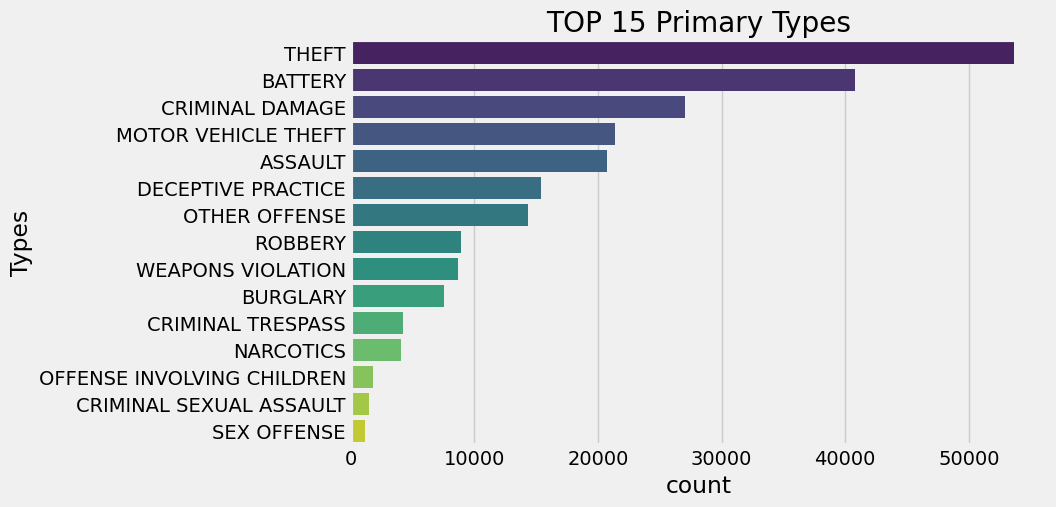

In [25]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,5))
sns.barplot(y=count_prim.index,x=count_prim.values,palette="viridis")
plt.title("TOP 15 Primary Types")
plt.ylabel("Types")
plt.xlabel("count")
plt.show()

In [26]:
count_Des = df['Description'].value_counts().head(10)
count_Des

Description
SIMPLE                           27089
OVER $500                        19674
DOMESTIC BATTERY SIMPLE          18636
$500 AND UNDER                   18533
AUTOMOBILE                       17087
TO VEHICLE                       14673
TO PROPERTY                      12101
RETAIL THEFT                      8572
AGGRAVATED - HANDGUN              6807
UNLAWFUL POSSESSION - HANDGUN     5395
Name: count, dtype: int64

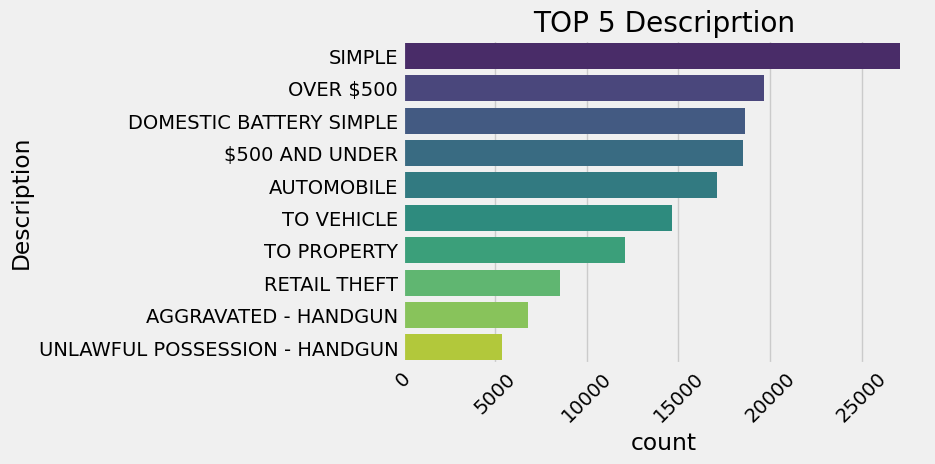

In [27]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,4))
sns.barplot(y=count_Des.index,x=count_Des.values,palette="viridis")
plt.title("TOP 5 Descriprtion")
plt.ylabel("Description")
plt.xlabel("count")
plt.xticks(rotation=45)
plt.show()

In [28]:
count = df['Arrest'].value_counts()
percentage = df['Arrest'].value_counts(normalize=True)*100
freqTable = pd.DataFrame({'Frequency':count,'Percentage':percentage})
freqTable

,Frequency,Percentage
Arrest,,
False,207650,88.402706
True,27241,11.597294


Imbalane in Arrest column  (False class > True class)
- which can lead to models that are biased toward the False class, resulting poor preditive performance for the True class. 

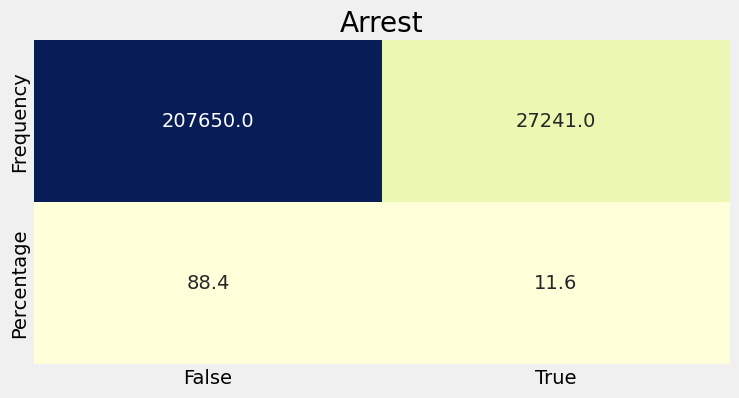

In [29]:
plt.figure(figsize=(8, 4))
sns.heatmap(freqTable.T, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
plt.title("Arrest")
plt.xlabel('')
plt.show()

In [30]:
count_dom = df['Domestic'].value_counts()
count_dom

Domestic
False    190348
True      44543
Name: count, dtype: int64

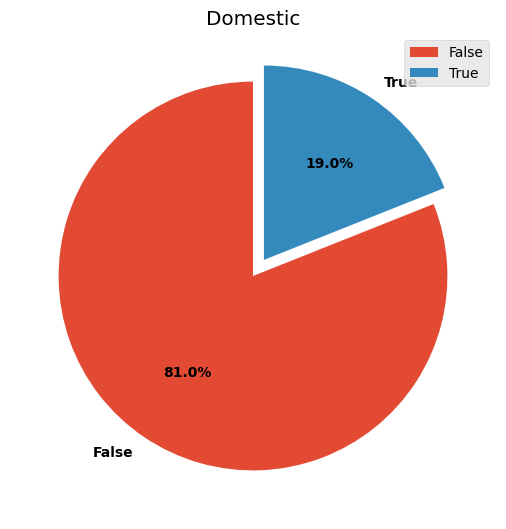

In [31]:
# Pie Chart
plt.style.use("ggplot")
plt.figure(figsize=(6, 6))
plt.pie(count_dom, labels=count_dom.index, autopct='%1.1f%%', startangle=90,textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Domestic")
plt.legend()
plt.show()

In [32]:
df['Beat'].value_counts()

Beat
1834    3024
123     2082
421     2057
1831    1863
423     1752
        ... 
1813     331
1654     303
1653     205
1655     118
1652      91
Name: count, Length: 274, dtype: int64

In [33]:
df['District'].value_counts()

District
8     14629
6     14578
12    14087
4     13811
11    13009
1     12652
18    12142
19    11934
3     11816
25    11792
2     11629
9     10260
7     10229
10     9850
5      9697
16     8872
24     8329
15     8234
14     7980
22     7578
17     6904
20     4864
31       15
Name: count, dtype: int64

In [34]:
df['Ward'].value_counts().head(20)

Ward
42.0    12338
27.0    10925
28.0     9918
41.0     8880
6.0      8504
49.0     8329
24.0     8012
4.0      7641
7.0      7508
8.0      7356
3.0      7341
21.0     7266
20.0     7248
9.0      6745
17.0     6650
5.0      6070
37.0     5934
34.0     5919
16.0     5888
25.0     5362
Name: count, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234891 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    234891 non-null  int64  
 1   Case Number           234891 non-null  object 
 2   Date                  234891 non-null  object 
 3   Block                 234891 non-null  object 
 4   IUCR                  234891 non-null  object 
 5   Primary Type          234891 non-null  object 
 6   Description           234891 non-null  object 
 7   Location Description  234891 non-null  object 
 8   Arrest                234891 non-null  bool   
 9   Domestic              234891 non-null  bool   
 10  Beat                  234891 non-null  int64  
 11  District              234891 non-null  int64  
 12  Ward                  234891 non-null  float64
 13  Community Area        234891 non-null  int64  
 14  FBI Code              234891 non-null  object 
 15  X Coo

In [36]:
df['Community Area'].value_counts().head(10)

Community Area
25    12122
8     10350
28     9301
43     8237
32     7791
24     7080
29     6539
71     6228
23     6026
44     6024
Name: count, dtype: int64

In [37]:
df['FBI Code'].value_counts()

FBI Code
6      53625
08B    33828
14     27028
7      21386
08A    17458
26     15400
11     12844
3       8953
15      8892
5       7564
04B     7474
04A     7268
18      4040
10      2430
2       1681
17      1538
24      1084
01A      725
20       652
9        421
16       283
22       203
13        75
12        22
19        10
01B        7
Name: count, dtype: int64

In [38]:
df = df.drop(columns=['Year','Location'])

- Year has value 2022 only 
- Location has the same value of longitude and latitude

## Bivariant Analysis

In [39]:
df.groupby(['IUCR', 'Primary Type', 'FBI Code']).size().head(20)

IUCR  Primary Type        FBI Code
031A  ROBBERY             3           3561
031B  ROBBERY             3             70
033A  ROBBERY             3            348
033B  ROBBERY             3             17
041A  BATTERY             04B         2106
041B  BATTERY             04B           11
051A  ASSAULT             04A         4643
051B  ASSAULT             04A          148
1010  ARSON               9              9
1020  ARSON               9            332
1025  ARSON               9             35
1030  ARSON               9              4
1050  HUMAN TRAFFICKING   26             6
1055  HUMAN TRAFFICKING   26             2
1090  ARSON               9             41
110   HOMICIDE            01A          724
1110  DECEPTIVE PRACTICE  11           614
1120  DECEPTIVE PRACTICE  10          1901
1121  DECEPTIVE PRACTICE  10           200
1122  DECEPTIVE PRACTICE  10           329
dtype: int64

In [40]:
df.groupby(['Primary Type'])['Description'].value_counts().head(50)

Primary Type                       Description                                                 
ARSON                              BY FIRE                                                           332
                                   ATTEMPT ARSON                                                      41
                                   AGGRAVATED                                                         35
                                   BY EXPLOSIVE                                                        9
                                   POSSESSION - EXPLOSIVE / INCENDIARY DEVICE                          4
ASSAULT                            SIMPLE                                                          13150
                                   AGGRAVATED - HANDGUN                                             4643
                                   AGGRAVATED - KNIFE / CUTTING INSTRUMENT                          1331
                                   AGGRAVATED - OTHER DANGEROUS 

In [41]:
df.groupby(['Primary Type'])['Arrest'].value_counts(normalize=True).head(10)*100

Primary Type                       Arrest
ARSON                              False     90.023753
                                   True       9.976247
ASSAULT                            False     90.341402
                                   True       9.658598
BATTERY                            False     85.460471
                                   True      14.539529
BURGLARY                           False     95.161290
                                   True       4.838710
CONCEALED CARRY LICENSE VIOLATION  True      96.045198
                                   False      3.954802
Name: proportion, dtype: float64

In [42]:
df.groupby(['Description'])['Arrest'].value_counts(normalize=True).head(10)*100

Description                                                   Arrest
$500 AND UNDER                                                False      98.408245
                                                              True        1.591755
ABUSE / NEGLECT - CARE FACILITY                               False     100.000000
AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY    False      78.953923
                                                              True       21.046077
AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY  False      60.465116
                                                              True       39.534884
AGGRAVATED                                                    False      88.282828
                                                              True       11.717172
AGGRAVATED - HANDGUN                                          False      90.436316
Name: proportion, dtype: float64

In [43]:
df.groupby(['Primary Type'])['Arrest'].value_counts(normalize=True).tail(10)*100


Primary Type       Arrest
ROBBERY            False     94.080197
                   True       5.919803
SEX OFFENSE        False     91.915641
                   True       8.084359
STALKING           False     93.473193
                   True       6.526807
THEFT              False     96.242424
                   True       3.757576
WEAPONS VIOLATION  True      61.871412
                   False     38.128588
Name: proportion, dtype: float64

In [44]:
df.groupby(['Location Description'])['Arrest'].value_counts(normalize=True).head(20)*100

Location Description                             Arrest
ABANDONED BUILDING                               False     81.196581
                                                 True      18.803419
AIRCRAFT                                         False     94.230769
                                                 True       5.769231
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA  False     87.368421
                                                 True      12.631579
AIRPORT BUILDING NON-TERMINAL - SECURE AREA      False     72.222222
                                                 True      27.777778
AIRPORT EXTERIOR - NON-SECURE AREA               False     92.857143
                                                 True       7.142857
AIRPORT EXTERIOR - SECURE AREA                   False     86.274510
                                                 True      13.725490
AIRPORT PARKING LOT                              False     95.833333
                                               

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234891 entries, 0 to 239557
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    234891 non-null  int64  
 1   Case Number           234891 non-null  object 
 2   Date                  234891 non-null  object 
 3   Block                 234891 non-null  object 
 4   IUCR                  234891 non-null  object 
 5   Primary Type          234891 non-null  object 
 6   Description           234891 non-null  object 
 7   Location Description  234891 non-null  object 
 8   Arrest                234891 non-null  bool   
 9   Domestic              234891 non-null  bool   
 10  Beat                  234891 non-null  int64  
 11  District              234891 non-null  int64  
 12  Ward                  234891 non-null  float64
 13  Community Area        234891 non-null  int64  
 14  FBI Code              234891 non-null  object 
 15  X Coo

# Preprocessing

## Feature Engineering

### Split Date & Time 

In [46]:
def splitTime(x):
    x = x.split(" ")
    x = x[1]
    return x[0:]
df['Time'] = df['Date'].apply(splitTime)


def splitDate(x):
    x = x.split(" ")
    x = x[0]
    return x[0:]
df.Date = df.Date.apply(splitDate)


In [47]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Time
0,12592454,JF113025,1/14/2022,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,7,16.0,68,26,1170805.0,1860170.0,9/14/2023 15:41,41.771782,-87.649437,15:55
1,12785595,JF346553,8/5/2022,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,3,5.0,69,17,1185135.0,1857211.0,9/14/2023 15:41,41.763338,-87.597001,21:00
2,12808281,JF373517,8/14/2022,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,16,41.0,11,17,1138383.0,1937953.0,9/14/2023 15:41,41.985875,-87.766404,14:00
3,12888104,JF469015,11/10/2022,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,7,17.0,68,15,1169903.0,1856822.0,9/14/2023 15:41,41.762615,-87.652840,3:47
5,12622465,JF149923,2/19/2022,010XX N FRANCISCO AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOSPITAL BUILDING / GROUNDS,True,True,...,12,26.0,24,08B,1156861.0,1906972.0,9/15/2023 15:41,41.900506,-87.699285,10:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239553,27038,JF387886,9/8/2022,061XX N WINTHROP AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,...,24,49.0,77,01A,1167747.0,1940929.0,12/29/2022 15:40,41.993457,-87.658318,10:50
239554,26819,JF275138,6/10/2022,018XX S CANAL ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,12,25.0,31,01A,1173423.0,1891309.0,9/19/2022 15:41,41.857173,-87.638918,23:41
239555,26601,JF132803,2/3/2022,000XX E 100TH PL,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,5,9.0,49,01A,1178641.0,1838358.0,9/19/2022 15:41,41.711753,-87.621374,16:27
239556,26857,JF290575,6/23/2022,027XX S KEDVALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,10,22.0,30,01A,1149162.0,1885416.0,9/1/2022 15:42,41.841506,-87.728122,2:25


### Split Block column

In [48]:
def splitBlock(x):
    x = x.split(" ")
    x = x[1:]
    return " ".join(x[0:])
df.Block = df.Block.apply(splitBlock)

## Encoding

In [49]:
columns = df[['Description','Primary Type','Location Description','Block','Date','Time']]
encoders={}
for col in columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder


#joblib.dump(encoders, 'encoders.pkl')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234891 entries, 0 to 239557
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    234891 non-null  int64  
 1   Case Number           234891 non-null  object 
 2   Date                  234891 non-null  int64  
 3   Block                 234891 non-null  int64  
 4   IUCR                  234891 non-null  object 
 5   Primary Type          234891 non-null  int64  
 6   Description           234891 non-null  int64  
 7   Location Description  234891 non-null  int64  
 8   Arrest                234891 non-null  bool   
 9   Domestic              234891 non-null  bool   
 10  Beat                  234891 non-null  int64  
 11  District              234891 non-null  int64  
 12  Ward                  234891 non-null  float64
 13  Community Area        234891 non-null  int64  
 14  FBI Code              234891 non-null  object 
 15  X Coo

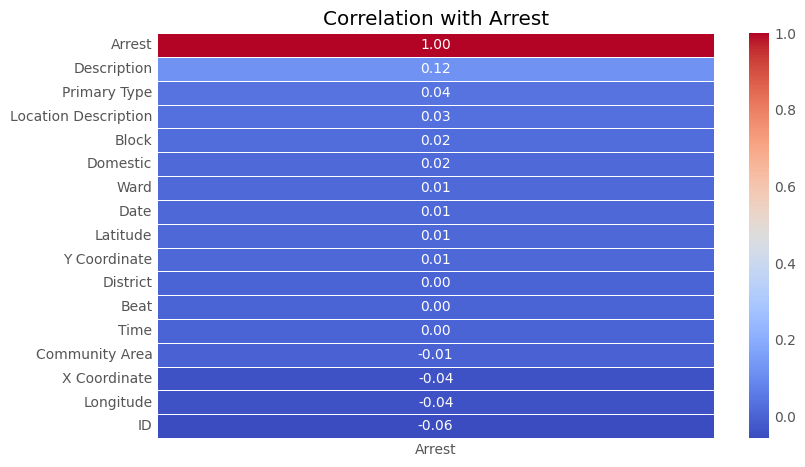

In [51]:
correlation_matrix = df.corr(numeric_only=True)
correlation_arrest = correlation_matrix['Arrest'].sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_arrest.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with Arrest')
plt.show()

# Features Selection

In [52]:
X = df.drop(columns=['ID','Arrest','Case Number','X Coordinate','Y Coordinate','Latitude','Longitude','IUCR','FBI Code','Community Area','Updated On']) 
y = df['Arrest']

In [53]:
X

,Date,Block,Primary Type,Description,Location Description,Domestic,Beat,District,Ward,Time
0,5,1384,22,129,102,True,724,7,16.0,415
1,330,1510,27,227,17,False,324,3,5.0,780
2,309,1805,27,13,102,False,1621,16,41.0,300
3,63,1362,30,214,119,False,733,7,17.0,1067
5,133,467,2,103,77,True,1211,12,26.0,96
...,...,...,...,...,...,...,...,...,...,...
239553,363,948,10,116,99,False,2433,24,49.0,110
239554,244,1069,10,116,119,False,1235,12,25.0,941
239555,144,0,10,116,21,False,511,5,9.0,447
239556,258,1265,10,116,119,False,1031,10,22.0,985


## Over-Sampling of data using SMOTE

### Handling Data Imbalancing 


In [54]:
smote = SMOTE(sampling_strategy=0.75,random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [55]:
y_resampled.value_counts()

Arrest
False    207650
True     155737
Name: count, dtype: int64

# Data splitting

In [56]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=57)
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,shuffle=True,random_state=57)

# ML Models

### Best Parameters

In [57]:
# import optuna
# def objective(trial):
#     params = {
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
#         'depth': trial.suggest_int('depth', 4, 10),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
#         'iterations': trial.suggest_int('iterations', 100, 500),
#         'subsample': trial.suggest_float('subsample', 0.8, 1.0),
#         'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.8, 1.0),
#         'random_state': 57,
#         'silent': True
#     }

   
#     model = CatBoostClassifier(**params)
#     model.fit(X_train, y_train, eval_set=(X_train, y_train), early_stopping_rounds=50, verbose=False)
#     preds = model.predict(X_train)
#     return accuracy_score(y_train, preds)


# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)


# print("Best Parameters:", study.best_params)
# print("Best Score:", study.best_value)

LogisticRegression
----------


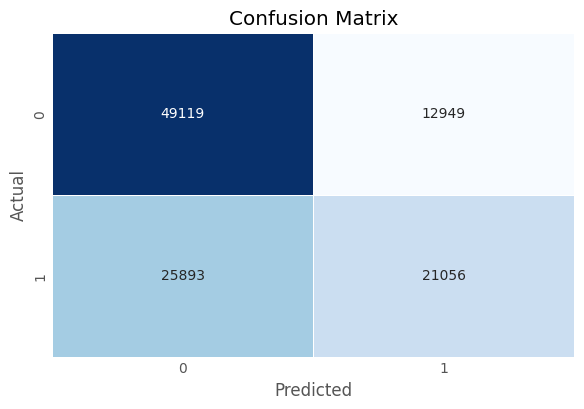

              precision    recall  f1-score   support

       False       0.65      0.79      0.72     62068
        True       0.62      0.45      0.52     46949

    accuracy                           0.64    109017
   macro avg       0.64      0.62      0.62    109017
weighted avg       0.64      0.64      0.63    109017

Decision Tree Classifier
----------


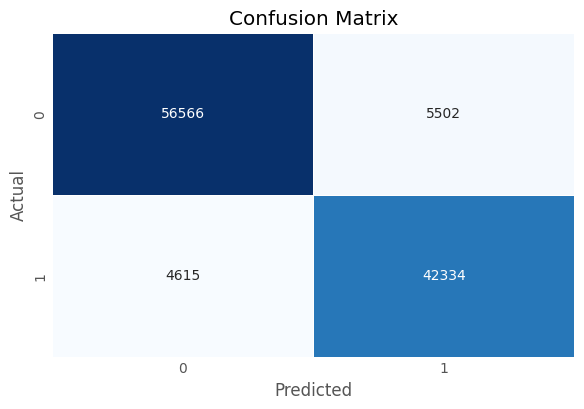

              precision    recall  f1-score   support

       False       0.92      0.91      0.92     62068
        True       0.88      0.90      0.89     46949

    accuracy                           0.91    109017
   macro avg       0.90      0.91      0.91    109017
weighted avg       0.91      0.91      0.91    109017

K-Nearest Neighbors
----------


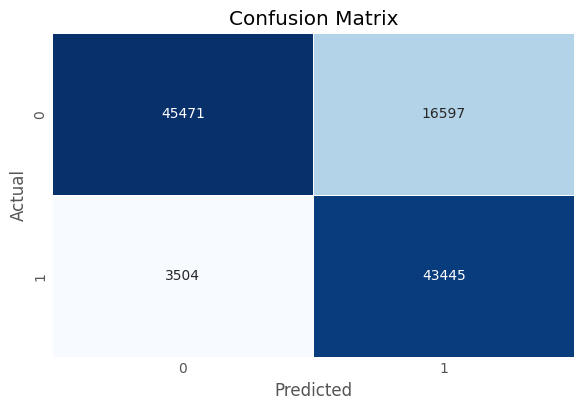

              precision    recall  f1-score   support

       False       0.93      0.73      0.82     62068
        True       0.72      0.93      0.81     46949

    accuracy                           0.82    109017
   macro avg       0.83      0.83      0.82    109017
weighted avg       0.84      0.82      0.82    109017

Random Forest
----------


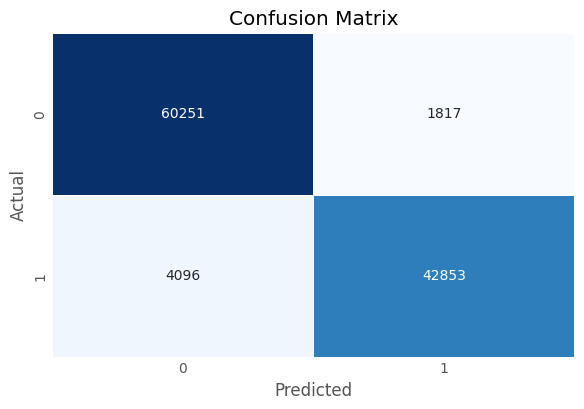

              precision    recall  f1-score   support

       False       0.94      0.97      0.95     62068
        True       0.96      0.91      0.94     46949

    accuracy                           0.95    109017
   macro avg       0.95      0.94      0.94    109017
weighted avg       0.95      0.95      0.95    109017

XGBoost
----------


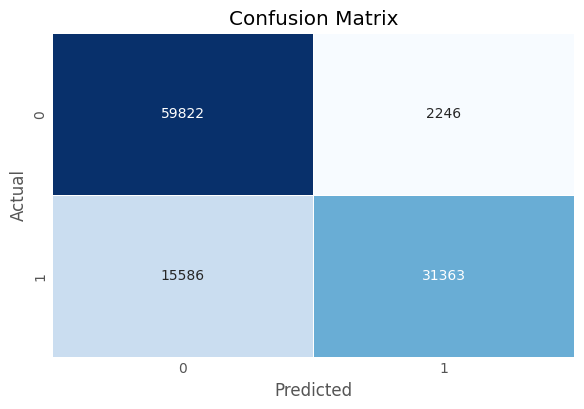

              precision    recall  f1-score   support

       False       0.79      0.96      0.87     62068
        True       0.93      0.67      0.78     46949

    accuracy                           0.84    109017
   macro avg       0.86      0.82      0.82    109017
weighted avg       0.85      0.84      0.83    109017

CatBoost
----------


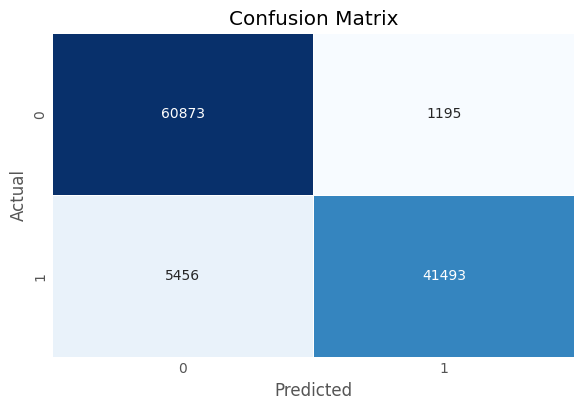

              precision    recall  f1-score   support

       False       0.92      0.98      0.95     62068
        True       0.97      0.88      0.93     46949

    accuracy                           0.94    109017
   macro avg       0.94      0.93      0.94    109017
weighted avg       0.94      0.94      0.94    109017

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
LightGBM
----------


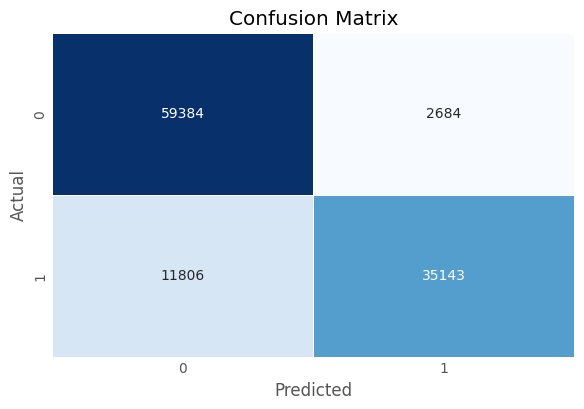

              precision    recall  f1-score   support

       False       0.83      0.96      0.89     62068
        True       0.93      0.75      0.83     46949

    accuracy                           0.87    109017
   macro avg       0.88      0.85      0.86    109017
weighted avg       0.88      0.87      0.86    109017



,Model,Accuracy Score,Precision,Recall,F1 Score,ROC-AUC
0,LogisticRegression,64.37%,61.92%,44.85%,52.02%,69.45%
1,Decision Tree Classifier,90.72%,88.5%,90.17%,89.33%,90.66%
2,K-Nearest Neighbors,81.56%,72.36%,92.54%,81.21%,90.84%
3,Random Forest,94.58%,95.93%,91.28%,93.55%,98.05%
4,XGBoost,83.64%,93.32%,66.8%,77.86%,92.52%
5,CatBoost,93.9%,97.2%,88.38%,92.58%,97.81%
6,LightGBM,86.71%,92.9%,74.85%,82.91%,94.25%


In [64]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'Decision Tree Classifier': DecisionTreeClassifier(splitter='best',random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=57),
    'XGBoost': XGBClassifier(n_estimators=100,learning_rate=0.01),
    'CatBoost': CatBoostClassifier(learning_rate=0.08,depth=10,l2_leaf_reg=1.7,iterations=500, verbose=0),
    'LightGBM': LGBMClassifier(n_estimators=100, learning_rate=0.01,verbose=0)
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    print(model_name)
    print("-"*10)
    
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred) * 100, 2)
    roc = round(roc_auc_score(y_test, y_pred_prob) * 100, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test, y_pred))
    results.append({
        'Model': model_name,
        'Accuracy Score': f"{accuracy}%",
        'Precision': f"{precision}%",
        'Recall': f"{recall}%",
        'F1 Score': f"{f1}%",
        'ROC-AUC': f"{roc}%"
    })

results_df = pd.DataFrame(results)
display(results_df)

95%
[[60251  1817]
 [ 4096 42853]]
              precision    recall  f1-score   support

       False       0.94      0.97      0.95     62068
        True       0.96      0.91      0.94     46949

    accuracy                           0.95    109017
   macro avg       0.95      0.94      0.94    109017
weighted avg       0.95      0.95      0.95    109017

98%


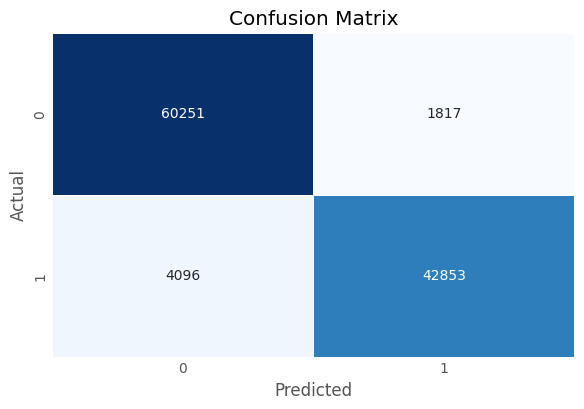

In [59]:
model = RandomForestClassifier(n_estimators=200, random_state=57)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


acc = accuracy_score(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred_prob)


print(f'{round(acc*100)}%')
print(confusion)
print(classification_rep)
print(f'{round(roc*100)}%')


plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Save the model to a file
#joblib.dump(model, 'Randomforest.pkl')
#print("Model saved successfully!")

# GUI

In [60]:
# # Load encoders and model
# encoders = joblib.load('encoders.pkl')
# model = joblib.load('Randomforest.pkl')
# y_pred_prob = model.predict_proba(X_test)[:, 1]
# def predict():
#     try:
#         # Collect inputs
#         description = description_var.get()
#         primary_type = primary_type_var.get()
#         location_description = location_description_var.get()
#         block = block_var.get()
#         domestic = 1 if domestic_var.get().lower() == "true" else 0
#         ward = float(ward_var.get())
#         date = date_var.get()
#         district = float(district_var.get())
#         beat = float(beat_var.get())
#         time = time_var.get()

#         # Handle date and time conversion
        
#         try:
#             time_parsed = datetime.strptime(time, "%H:%M")
#         except ValueError as e:
#             result_label.config(text=f"Invalid time format. Please use HH:MM. Error: {e}")
#             return
        
#         # Encode categorical inputs using the loaded encoders
#         date_encoded = encoders['Date'].transform([date])[0]
#         description_encoded = encoders['Description'].transform([description])[0]# if description in encoders['Description'].classes_ else -1
#         primary_type_encoded = encoders['Primary Type'].transform([primary_type])[0]# if primary_type in encoders['Primary Type'].classes_ else -1
#         location_description_encoded = encoders['Location Description'].transform([location_description])[0]# if location_description in encoders['Location Description'].classes_ else -1
#         block_encoded = encoders['Block'].transform([block])[0]# if block in encoders['Block'].classes_ else -1
#         time_encoded = encoders['Time'].transform([time])[0]
#         # Prepare input for the model
#         encoded_inputs = [
#             date_encoded,
#             block_encoded,
#             primary_type_encoded,
#             description_encoded,
#             location_description_encoded,
#             domestic,
#             beat,
#             district,
#             ward,
#             time_encoded
#         ]
#         prediction = model.predict([encoded_inputs])[0]
#         probabilities = model.predict_proba([encoded_inputs])[0][1] 
#         probabilities = round(probabilities, 2)  

        
#         result_label.config(text=f'Prediction: {prediction}\nProbability: {probabilities}')

       

#     except Exception as e:
#         result_label.config(text=f"Error: {e}")

# # Create GUI window
# root = tk.Tk()
# root.title("Crime Prediction System")

# # Input fields
# description_var = tk.StringVar()
# primary_type_var = tk.StringVar()
# location_description_var = tk.StringVar()
# block_var = tk.StringVar()
# domestic_var = tk.StringVar()
# ward_var = tk.StringVar()
# date_var = tk.StringVar()
# district_var = tk.StringVar()
# beat_var = tk.StringVar()
# time_var = tk.StringVar()

# fields = [
#     ('Description', description_var),
#     ('Primary Type', primary_type_var),
#     ('Location Description', location_description_var),
#     ('Block', block_var),
#     ('Domestic (Yes/No)', domestic_var),
#     ('Ward', ward_var),
#     ('Date', date_var),
#     ('District', district_var),
#     ('Beat', beat_var),
#     ('Time (HH:MM)', time_var)
# ]

# for i, (label, var) in enumerate(fields):
#     ttk.Label(root, text=label).grid(row=i, column=0, padx=10, pady=5, sticky='w')
#     ttk.Entry(root, textvariable=var).grid(row=i, column=1, padx=10, pady=5)

# # Predict button
# ttk.Button(root, text="Predict", command=predict).grid(row=len(fields), column=0, columnspan=2, pady=10)

# # Result label
# result_label = ttk.Label(root, text="Prediction will appear here.")
# result_label.grid(row=len(fields) + 1, column=0, columnspan=2)

# root.mainloop()